In [5]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.utils import to_categorical,plot_model
from keras.models import Sequential
from keras.datasets import mnist
from keras import utils

In [21]:
(X_train,y_train),(X_test,y_test)  = mnist.load_data()

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
X_test.shape

(10000, 28, 28)

In [24]:
y_train.shape

(60000,)

In [25]:
y_test.shape

(10000,)

In [26]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

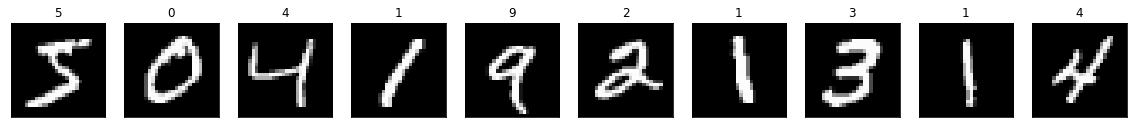

In [27]:
fig, axes = plt.subplots(ncols = 10 ,sharex = False,sharey = True,figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i],cmap ='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [28]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [31]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

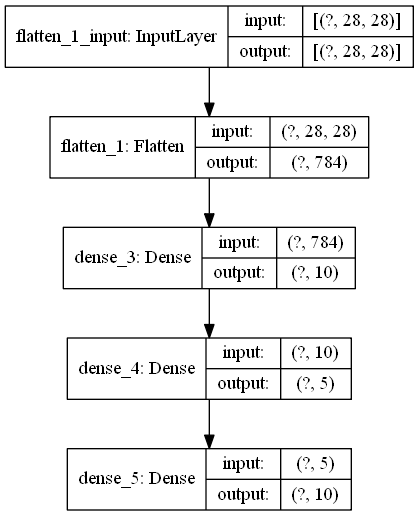

In [32]:
utils.plot_model(model,show_shapes = True)

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['acc'])

In [34]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7227 - acc: 0.4455 - val_loss: 1.3553 - val_acc: 0.5688
Epoch 2/20
1875/1875 [==============================] - 2s 986us/step - loss: 1.1477 - acc: 0.6535 - val_loss: 0.9706 - val_acc: 0.7254
Epoch 3/20
1875/1875 [==============================] - 2s 951us/step - loss: 0.8733 - acc: 0.7441 - val_loss: 0.8064 - val_acc: 0.7670
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7800 - acc: 0.7656 - val_loss: 0.7618 - val_acc: 0.7793
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7256 - acc: 0.7862 - val_loss: 0.7025 - val_acc: 0.7914
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6916 - acc: 0.7879 - val_loss: 0.6752 - val_acc: 0.7925
Epoch 7/20
1875/1875 [==============================] - 2s 971us/step - loss: 0.6667 - acc: 0.7976 - val_loss: 0.6210 - val_acc: 0.8105
Epoch 8/20
1875/1875 [==============================] - 

In [35]:
model.save('mnist.h5')